# Image Clothing Classifier

We will train a neural network model to classify images of clothing such as sneakers and shorts. We will use keras a python deep learning API to build and train models in TensorFlow.

In [2]:
#import tensorflow and tf.keras
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt


# Import the Fashion MNIST dataset

We will be using the fashion MNIST dataset which contains 70 000 images in 10 categories. The images show individual articles of clothing in 28 by 28 pixels.

We will use 60 000 images to train network and 10 000 images to evaluate how accurate the network is in classifying images.

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Loading the dataset gives four NumPy arrays. 

*   train_images and train_labels are the training set which is the data the model uses to learn.
*   test_images and test_labels will be the test set.

The images are 28x28 NumPy arrays with pixel values ranging from 0 to 255. The labels are array of integers ranging from 0 to 9, corresponding to the class of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Let's store the class names so we can use them later when plotting the images.

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Exploring the Data

Let's explore the format of the dataset before training the model.

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels)

60000

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_labels)

10000

# Preprocess the data

The data should be preprocessed before training the network. You'll see that the pixel values fall in the range of 0 to 255:

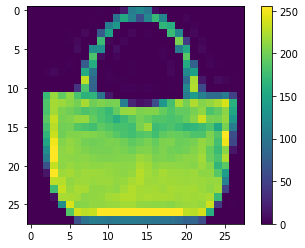

In [13]:
plt.figure()
plt.imshow(train_images[100])
plt.colorbar()
plt.grid(False)
plt.show()

We should scale these pixel values to a range of 0 to 1 before feeding them to the neural network.

In [15]:
train_images = train_images / 255.0
test_images = test_images / 255.0

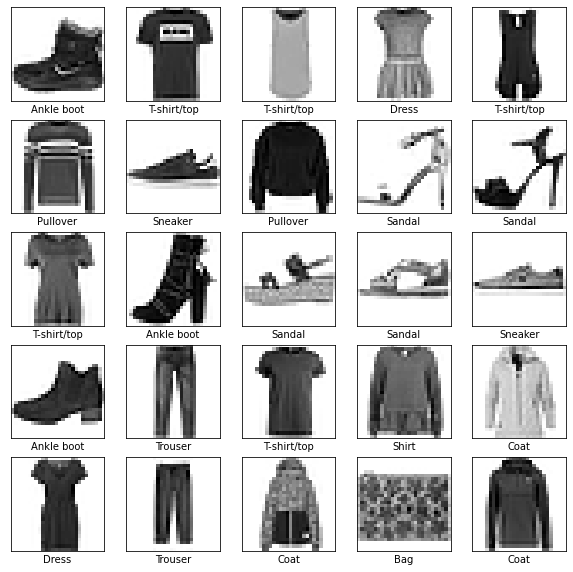

In [18]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

# Build the model

Build the neural network by configuring the layers of the model, then compiling the model.

# Set up the layers

The basic building block of a neural network is the layer. Layers extract representations from data fed into them. These representations could be more meaningful for the problem at hand.

A lot of deeplearning consists of chaining together simple layers. Layers such as, tf.keras.layers.Dense, have parameters which are learned during training

In [21]:
model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28)),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(10)
])

The first layer in the network, tf.keras.layers.Flatten, transforms the images from a 2-D array (28x28 pixels) to 1-D array of (28*28 = 784 pixels). This layer unstack rows of pixels and lines them up. It has no parameters to learn; only reformats the data.

Once pixels are flattened, the network has two tf.keras.layers.Dense layers. These are densely connect, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second dense layer returns a logotis array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

# Compile the model

Before the model is ready for training it needs some more settings. These are added during the model's compile step:

* Loss function - measures how accurate the model is during training. Minimize this function to 'steer' the model in the right direction
* Optimizer - how the model is updated based on the data it sees and its loss function
* Metrics - used to monitor the training and testing steps, the following example uses accuracy, the images that are correctly classified

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model

Training the neural network model requires:

1. Feed the training data into the model. In this example, the training data is in the train_images and train_labels arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set (test_images array)
4. Verify that predictions match labels from test_labels array

# Feed the model
To start training, call model.fit so it 'fits' the data.

In [26]:
model.fit(train_images, train_labels, epochs=25)


Epoch 1/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3954 - accuracy: 0.8598
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3920 - accuracy: 0.8622
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3882 - accuracy: 0.8626
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3849 - accuracy: 0.8637
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3815 - accuracy: 0.8651
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3781 - accuracy: 0.8663
Epoch 7/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3749 - accuracy: 0.8673
Epoch 8/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3717 - accuracy: 0.8683
Epoch 9/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3695 - accuracy: 0.8689
Epoch 10/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.366

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuract of 88% on the training data.

# Evaluate accuracy 

Now compare how the model performs on the test dataset

In [27]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy: ', test_acc)

313/313 - 0s - loss: 0.3849 - accuracy: 0.8620

Test accuracy:  0.8619999885559082


So the accuracy on the test dataset is less accurate than the accuracy on the training dataset. This represents overfitting, which happens when a machine learning model performs worse on new, unseeen inputs than it does on training data. An overfitted model 'memorizes' the noise and details in the training datast to a point that it negatively impacts the performance of the model on the new data.

# Make Predictions

With the model now trained, we can make predictions about the images. The model's linear outputs, logits. Attach a softmax layer to convert the logits to probabilities, which are easier to interpret.

In [28]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [29]:
predictions = probability_model.predict(test_images)

In [30]:
predictions[0]

array([2.1821409e-08, 4.6590110e-09, 1.9146062e-06, 5.0257540e-07,
       2.9060036e-06, 1.2658687e-01, 9.8694827e-06, 3.5563260e-02,
       2.6086750e-03, 8.3522600e-01], dtype=float32)

A prediction is an array of 10 numbers, which represents the model's confidence that the image corresponds to each of the 10 different labels/articles of clothing. Check which label has the highest confidence value.

In [31]:
np.argmax(predictions[0])

9

Check if it's accurate:

In [32]:
test_labels[0]

9

Graph this to look at full set of 10 class predictions.

In [33]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

With the model we trained, use it to make predictions about some images. Correct predictions are blue, incorrect, red. The numbers gives the percentage for the predicted label.

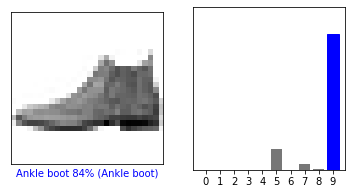

In [34]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

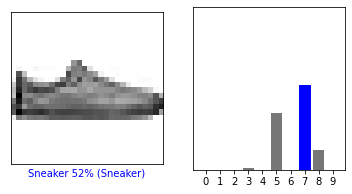

In [35]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

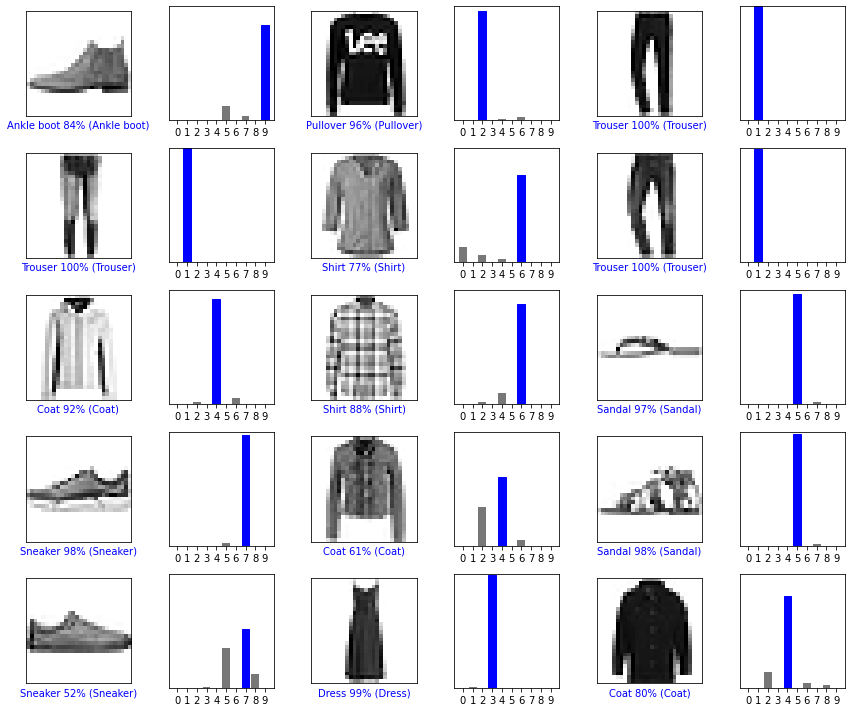

In [36]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Use trained model
Now use the trained model to make a prediction about a single image

In [37]:
img = test_images[1]
print(img.shape)

(28, 28)


tf.keras models are optimized to make predictions on a batch or collection of examples at once. Even though we're using a single image, we need to add it to a list

In [38]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [39]:
predictions_single = probability_model.predict(img)
print(predictions_single)

[[2.3081219e-04 1.4487679e-07 9.6095800e-01 1.2050709e-06 9.2000598e-03
  5.5929860e-14 2.9587924e-02 2.7249568e-25 2.1854306e-05 3.1327220e-18]]


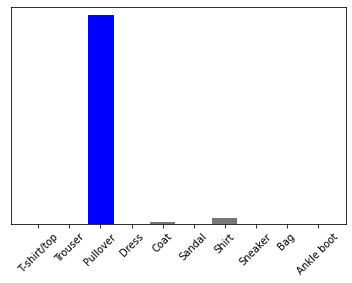

In [42]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)